# Simpson's Rule

I begin this assignment by loading necessary packages:

In [3]:
import numpy as np
from matplotlib import pyplot as plt

___

## Problem 1

Derive directly the simple Simpson rule on $[−1, 1]$ by approximating the integrand f with the Hermite-interpolation polynomial, which interpolates $f(−1)$, $f(0)$, $f'(0)$, and $f(1)$.

##### Solution
In order to derive the simple Simpson Rule, we want to use $3$ evenly spaced nodes on $[-1,1]$, ie nodes at $-1, 0, 1$.

We also have the interpolating data at $f(−1)$, $f(0)$, $f'(0)$, and $f(1)$. 

Thus, we can use the divided differences to give us an interpolating polynomial that can be integrated in order to get the simple Simpson's Rule on [-1,1]:

\begin{align*}
& Q_{2}[f] =\int_{-1}^{1}f(x)\textrm{d}x = \frac{(b-a)}{6}\left[f(-1) + 4f\left(\frac{b-a}{2}\right) + f(1)\right] \\
& Q_{2}[f] = \frac{1}{3}\left[f(-1) + 4f(0) + f(1)\right] \textrm{ for } [a,b] = [-1,1]
\end{align*}

Therefore we begin with the divided differences table:

$$
\begin{array}{cccccc}
-1 & f(-1) \\
    &     & f[-1,0] \\
0 & f(0) &             & f[-1,0,0]\\
    &     & f[0,0]  &              & f[-1,0,0,1]\\
0 & f(0) &             & f[0,0,1] &        \\     
    &     & f[0,1] &              \\
1 & f(1) &             
\end{array}
$$

Which fills in as:

$$
\begin{array}{cccccc}
-1 & f(-1) \\
    &     & f(0)-f(-1) \\
0 & f(0) &             & f'(0)+f(-1)-f(0)\\
    &     & f'(0)  &              & f'(0) + \frac{f(1)-f(-1)}{2}\\
0 & f(0) &             & f(1)-f(0)-f'(0) &        \\     
    &     & f(1)-f(0)  &              \\
1 & f(1) &             
\end{array}
$$

We then use these to get the following interpolating polynomial:

\begin{align*}
& p_{3}(x) = f(-1) + \left[f(0)-f(-1)\right](x+1) + \\
& \left[f'(0)+f(-1)-f(0)\right]x(x+1) +  \left[f'(0) + \frac{f(1)-f(-1)}{2}\right]x^2(x+1)
\end{align*}

Then by simplifying we have:

$$p_{3}(x) = f(-1)\left[\frac{x^2 - x^3}{2}\right] + f(0)\left[1-x^2\right] + f(1)\left[\frac{x^2 + x^3}{2}\right]$$

Now, since $p_{3}(x)$ is an interpolating polynomial for $f(x)$, we have:

$$\int_{-1}^{1}f(x)\textrm{d}x = \int_{-1}^{1}p_{3}(x)\textrm{d}x = \int_{-1}^{1}f(-1)\left[\frac{x^2 - x^3}{2}\right] + f(0)\left[1-x^2\right] + f(1)\left[\frac{x^2 + x^3}{2}\right]\textrm{d}x $$

Then integrating $p_{3}(x)$ gives:

$$\int_{-1}^{1}f(x)\textrm{d}x = \int_{-1}^{1}p_{3}(x)\textrm{d}x = \frac{1}{3}\left[f(-1) + 4f(0) + f(1)\right]$$

Which is exactly the simple Simpson's rule on the interval $[-1,1]$!

____

## Problem 2

Let 
\begin{equation*}
f(x) = \begin{cases}
1 + x, & -1 \leq x \leq 0 \\
1 - x ,& 0 \leq x \leq 1
\end{cases}
\end{equation*}

Find an approximation of the integral $f$ over $\left[-1,1\right]$ by using the methods below:

Compute the error in each case and explain the differences in the accuracy of the results.

##### Solution 

Firstly we compute the true value of $\displaystyle{\int_{-1}^{1}f(x)dx}$ through piecewise analytic integration to get:

\begin{align*}
& \int_{-1}^{1}f(x)dx = \int_{-1}^{0}f(x)dx + \int_{0}^{1}f(x)dx\\
& \int_{-1}^{1}f(x)dx = \left[x + \frac{x^2}{2}\right]^{0}_{-1} + \left[x - \frac{x^2}{2}\right]^{1}_{0}\\
& \int_{-1}^{1}f(x)dx = 1 - \frac{1}{2} + 1 - \frac{1}{2} = 1
\end{align*}

So we get:
$$\int_{-1}^{1}f(x)dx = 1$$

This will allow us to compute the error for each of our simple quadratures.

In [4]:
true_value = 1

And now we define our function in code:

In [5]:
f = lambda x: 1 + x if x <= 0 else 1-x

#### Part A) 
The simple Trapezoidal Rule over $\left[-1,1\right]$

##### Solution
Firstly we compute the integral using the simple Trapezoidal Quadrature on the whole interval:

In [22]:
def Simple_Trapezoidal_Quad(I, f):
    a,b = I
    return ((b-a)/2)*(f(a)+f(b))

In [23]:
I = (-1,1)
simple_trap_value = Simple_Trapezoidal_Quad(I, f)
simple_trap_value

0.0

In this case we get a value of $0$ using the quadrature, providing us with the following error:

In [8]:
np.abs(simple_trap_value - true_value)

-1.0

We get a completely incorrect value due to the interval being the whole interval. We essentially approximate $f$ with a straight line which integrates to area 0. This can be seen in the plot below:

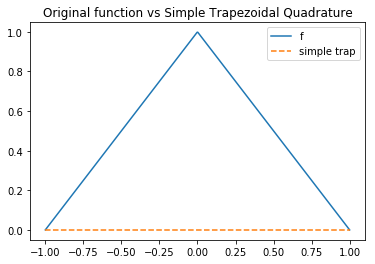

In [9]:
points = np.linspace(-1,1,500)

plt.plot(points, np.vectorize(f)(points), label = "f")
plt.plot([-1,1],[0,0], label = "simple trap", linestyle="--")
plt.title("Original function vs Simple Trapezoidal Quadrature")
plt.legend();

#### Part B)
The simple Simpsons rule over $[-1,1]$

##### Solution
Here we define code which approximates the result using the simple Simpson's rule on $[-1,1]$ which we proved in problem 1.

In [10]:
def Simple_Simpson_Quad(I, f):
    a, b = I
    return (1/6)*(b-a)*(f(a) + 4*f((b+a)/2) + f(b))

In [11]:
I = (-1,1)
simple_simpsons_value = Simple_Simpson_Quad(I, f)
simple_simpsons_value

1.3333333333333333

In this case we get a value of $1.33333$ using the quadrature, providing us with the following error:

In [12]:
np.abs(simple_simpsons_value - true_value)

0.33333333333333326

In this case, we get a value that over-estimates that of the true value due to the intermediate term which gives a high value at $0$, this can be seen below.

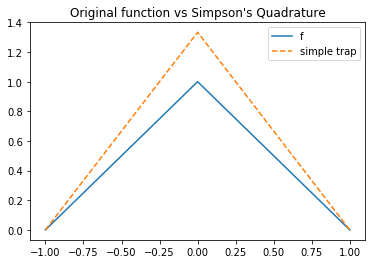

In [13]:
points = np.linspace(-1,1,500)

plt.plot(points, np.vectorize(f)(points), label = "f")
plt.plot([-1,0,1],[f(-1)/3, 4*f(0)/3, f(1)/3], label = "simple trap", linestyle="--")
plt.title("Original function vs Simpson's Quadrature")
plt.legend();

#### Part C) 
The simple Trapezoidal Rule over $[-1,0]$, and then over $[0,1]$

##### Solution
Here, we just use the previous code for our simple trapezoidal rule on the two intervals.

In [104]:
I_1 = (-1,0)
I_2 = (0,1)
composite_trap_value = \
    Simple_Trapezoidal_Quad(I_1,f) + \
    Simple_Trapezoidal_Quad(I_2, f)
composite_trap_value

2.5430806348152437

In this case we get a value of $1$ using the quadrature, providing us with the following error:

In [105]:
np.abs(composite_trap_value - true_value)

0.19267824752764096

In this case, we get the exact value because we are able to estimate the path correctly with 2 trapezoids. This can be seen below.

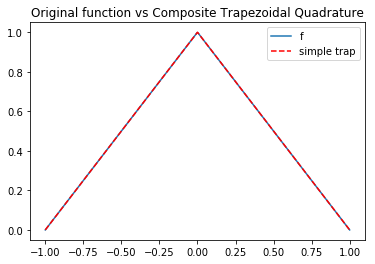

In [16]:
points = np.linspace(-1,1,500)

plt.plot(points, np.vectorize(f)(points), label = "f")
plt.plot(np.append(I_1, I_2),np.vectorize(f)(np.append(I_1, I_2)), 
         label = "simple trap", linestyle="--", color = "red")
plt.title("Original function vs Composite Trapezoidal Quadrature")
plt.legend();

___

## Problem 3

#### Part a)
Construct a quadrature rule of the form 

$$\int_{-1}^{1} f(x)\textrm{d}x = A_{0}f(-1) + A_{1}f(0) + A_{2}f(1)$$

which is exact for polynomials of degree $\leq 2$.

##### Solution

To do this, we want to find an interpolatory quadrature of the form:

$$Q_{n}[f] = \int_{-1}^{1}f(x)w(x)\textrm{d}x = \sum_{j = 0}^{n}A_{j}f(x_{j}) \textrm{ for }$$

In this case, since we want exactness for polynomials of degree $\leq 2$, we set $n = 2$. And  $w \equiv 1$ for our interval where we are $[-1,1]$.

$$Q_{2}[f] = \int_{-1}^{1}f(x)\textrm{d}x = \sum_{j = 0}^{2}A_{j}f(x_{j}) \textrm{ for }$$

Next, we utilize the Lagrange Polynomial form to find the weights.

**Note:** (We could use the method of undetermined coefficients as well, however I wanted to do it both ways, so in part b we use it instead.)

We get:

$$A_{j} = \int_{-1}^{1}l_{j}(x)w(x)\textrm{d}x$$

Next, since we set the weight function $w \equiv 1$ since we are on $[-1,1]$, we get:

$$A_{j} = \int_{-1}^{1}l_{j}(x)\textrm{d}x $$

Finally, we solve for each:

$$l_{0} = \int_{-1}^{1}\frac{(x-0)(x-1)}{(-1-0)(-1-1)}\textrm{d}x = \frac{1}{3}$$

$$l_{1} = \int_{-1}^{1}\frac{(x-(-1))(x-1)}{(0-(-1))(0-1)}\textrm{d}x = \frac{4}{3}$$

$$l_{2} = \int_{-1}^{1}\frac{(x-(-1))(x-0)}{(1-(-1))(1-0)}\textrm{d}x = \frac{1}{3}$$

Which now gives us our quadrature rule as:

$$Q_{2}[f] = \frac{1}{3}f(-1) + \frac{4}{3}f(0) + \frac{1}{3}f(-1) = \int_{-1}^{1}f(x)\textrm{d}x$$

Which is the same as the Simpson's quadrature we found earlier!

#### Part b)
Derive the 3-point (Legendre) Gaussian quadrature to approximate $\int_{-1}^{1}f(x)\textrm{d}x$ (i.e. you need to obtain the nodes $x_{0},x_{1}, x_{2}$ and the corresponding weights $A_{0}, A_{1}, A_{2}$).

##### Solution
The goal of a Gaussian Quadrature is to create an interpolatory quadrature rule that has precision $2n+1$. This is done by using orthogonal polynomials in respect to the inner product:

$$\langle f,g \rangle =  \int_{a}^{b}f(x)g(x)w(x)\textrm{d}x$$

In this case, we again have $w \equiv 1$. 

Thus, to construct our 3-point rule, we utilize the corresponding orthogonal Legendre polynomials. 
Since we want to use 3 interpolating nodes, we will be utilizing the 3rd order Legendre Polynomial: $\psi_{3} = x^{3}-\frac{3}{5}x$

Notice that $\psi_{3}$ has roots at: $x = -\frac{\sqrt{15}}{5}, 0, \frac{\sqrt{15}}{5}$

Thus, we use the roots of $\psi_{3}$ as our interpolating nodes, and continue by using the method of undetermined coefficients.

\begin{align*}
& 2 = \int_{-1}^{1}1\textrm{d}x = A_{0} + A_{1} + A_{2}\\
& 0 = \int_{-1}^{1}x\textrm{d}x = A_{0}\left( -\frac{\sqrt{15}}{5}\right) + A_{1}(0) + A_{2}\left(\frac{\sqrt{15}}{5}\right)\\
& \frac{2}{3} = \int_{-1}^{1}x^{2}\textrm{d}x =  A_{0}\left(-\frac{\sqrt{15}}{5}\right)^2 + A_{1}(0)^2 + A_{2}\left(\frac{\sqrt{15}}{5}\right)^2
\end{align*}

Which gives a $3 \times 3$ system of equations that allows us to solve for each weight of our quadrature.

After solving we have, $A_{1} = \frac{5}{9}, A_{2} = \frac{8}{9}, A_{3} = \frac{5}{9}$.

Which gives the following quadrature rule:
$$Q_{2}[f] = \frac{5}{9}f\left(-\frac{\sqrt{15}}{5}\right) + \frac{8}{9}f\left(0\right) + \frac{5}{9}f\left(\frac{\sqrt{15}}{5}\right)$$

#### Part c)
Verify its degree of precision.

##### Solution
Since we wanted a Quadrature rule utilizing 3 points, we used the third order Legendre Polynomial, $\psi_{3} = \psi_{2+1}$. 

From **Theorem 8.2**, we have that our Gaussian Quadrature has a degree of precision $k = 2\times 2 +1 = 5$. 

Therefore, we should have exact approximations for polynomials up to degree 5 on the interval $[-1,1]$.

We can move forward and verify this empirically by testing out approximations to polynomials up to degree 5 on $[-1,1]$.

Here we define our code which gives us an interpolating quadrature rule for the given roots of a Legendre polynomial.

In [33]:
def Gaussian_n_Quad(psi_roots, I, f = None):
    a, b = I
    n = len(psi_roots)
    
    # We solve for each A using the method of undetermined coefficients
    A_coeffs = np.array([psi_3_roots**i for i in range(n)])
    
    Integrated_n_Poly = lambda i: (lambda x: (x**(i+1))/(i+1))
    
    exact_int_funcs = np.array([Integrated_n_Poly(i) for i in range(n)])
    exact_vals = np.array([g(b) - g(a) for g in exact_int_funcs])
    
    A = np.linalg.solve(A_coeffs, exact_vals)

    if f is None:
        return lambda f: np.sum(A*np.vectorize(f)(psi_roots))
    else:
        return np.sum(A*np.vectorize(f)(psi_roots))

Which we then utilize:

In [41]:
psi_3_roots = np.array([-np.sqrt(15)/5, 0, np.sqrt(15)/5])
Gaussian_3_Quad = Gaussian_n_Quad(psi_3_roots, (-1,1))

We now use it in order to approximate values for polynomials up to degree 5.

In [94]:
n = 6
a,b = (-1,1)

poly = lambda i: lambda x: x**i
Integrated_n_Poly = lambda i: (lambda x: (x**(i+1))/(i+1))

test_funcs = np.array([poly(i) for i in range(n+1)])

true_results = np.array(
    [Integrated_n_Poly(i)(b)-Integrated_n_Poly(i)(a) for i in range(n+1)]
)
quad_results = np.vectorize(Gaussian_3_Quad)(test_funcs)


print("Results of Quadrature:")
for i in range(n+1):
    print(("f(x) = x^{:<0d}: I[f] = {:<8f},  Q[f] = {:<8f}"
           .format(i, true_results[i], quad_results[i])))

Results of Quadrature:
f(x) = x^0: I[f] = 2.000000,  Q[f] = 2.000000
f(x) = x^1: I[f] = 0.000000,  Q[f] = 0.000000
f(x) = x^2: I[f] = 0.666667,  Q[f] = 0.666667
f(x) = x^3: I[f] = 0.000000,  Q[f] = 0.000000
f(x) = x^4: I[f] = 0.400000,  Q[f] = 0.400000
f(x) = x^5: I[f] = 0.000000,  Q[f] = 0.000000
f(x) = x^6: I[f] = 0.285714,  Q[f] = 0.240000


Which as seen above, the true value of each integral matches that of the approximation of our quadrature rule, up to the 5th order polynomial. Thus our theoretical result of precision $k = 5$ is correct!

#### Part d) 
Compare the accuracy of this 3-point Gaussian quadrature with that of the simple Simpson rule for approximating $\int_{-1}^{1}e^{x}\textrm{d}x$.

##### Solution
We utilize the code we wrote above in order to approximate $\int_{-1}^{1}e^{x}\textrm{d}x$ with 2 different methods. This is done below:

In [108]:
I = (-1,1)
f = lambda x: np.exp(x)

simpsons_approx = Simple_Simpson_Quad(I, f)
gauss_3_pt_approx = Gaussian_3_Quad(f)
true_value = f(1)-f(-1)


print("Results:")
print(("True Value: {:<8f}\r\nSimpson's Rule: {:<8f}\r\n3-Pt Gaussian Rule: {:<8f}".
      format(true_value, simpsons_approx, gauss_3_pt_approx)))

print("\r\nAbsolute Errors:")
print("Simpson's Rule: {:<8f}\r\n3-Pt Gaussian Rule: {:<8f}".format(
np.abs(true_value-simpsons_approx), np.abs(true_value - gauss_3_pt_approx)))

Results:
True Value: 2.350402
Simpson's Rule: 2.362054
3-Pt Gaussian Rule: 2.350337

Absolute Errors:
Simpson's Rule: 0.011651
3-Pt Gaussian Rule: 0.000065


As seen above, the Gaussian 3-Point Quadrature gives us a much better approximation to $\int_{-1}^{1}e^{x}\textrm{d}x$. This is due to the innately higher precision of the Gaussian Quadrature Rule. The Simple Simpson's Quadrature has only precision of degree $3$, whereas the Gaussian 3-Point Quadrature we constructed has precision of degree $5$.

#### Part e)
Show that the 3-point Gaussian quadrature can be used for approximating all $\int_{-1}^{1}f(x)\textrm{d}x$ by doing a simple change of variables an apply this to approximate

$$\int_{0}^{4}\frac{\sin x}{x}\textrm{d}x$$

##### Solution
By using a simple change of variables we have the following reparameterization:

$$\int_{0}^{4}\frac{\sin x}{x}\textrm{d}x = \int_{-1}^{1}\frac{2\sin \left(2t+2\right)}{(2t+2)}\textrm{d}t$$

Which we can then use as the function we want to approximate using our 3-Point Gaussian Quadrature from earlier!

This is utilized below to get a very good approximation.

In [116]:
f = lambda x: 2*(np.sin(2*x+2))/(2*x + 2)

gauss_3_pt_approx = Gaussian_3_Quad(f)
gauss_3_pt_approx

1.7580220254363572

We can compare our approximation to the true value by using the built in sine integral function in `scipy`.

In [127]:
from scipy import special
sci_py_approx = special.sici(4)[0]
sci_py_approx

1.758203138949053

Which we can see is a very good, very close approximation!